# Les 1: Modelleren met Alphafold en Gromacs

## Opdracht:

*Noteer welk eiwit en welke sequentie je hebt gekozen en geef een korte achtergrond/motivatie.*

Het eiwit dat wij hebben gekozen is het eiwit met de identifier 6GQP op de protein data bank. Dit eiwit heet *'vascular endothelial growth factor receptor 2'*. Dit eiwit speelt een essentiële rol bij angiogenese, vasculaire ontwikkeling, vasculaire permeabiliteit, en embryonale hematopoëse. Ook promoot het proliferatie, survival, migratie en differentatie van endotheel cellen. [bron](https://www.uniprot.org/uniprotkb/P35968/entry#function)

Voor de controle sequentie hebben wij het kinase deel gekozen van VEGFR2. Het kinase deel loopt van positie 834 tot 1162 deze hebben we vekregen via [uniprot](https://www.uniprot.org/uniprotkb/P35968/entry#family_and_domains) en ziet er als volgt uit:

```
LKLGKPLGRGAFGQVIEADAFGIDKTATCRTVAVKMLKEGATHSEHRALMSELKILIHIGHHLNVVNLLGACTKPGGPLMVIVEFCKFGNL
STYLRSKRNEFVPYKTKGARFRQGKDYVGAIPVDLKRRLDSITSSQSSASSGFVEEKSLSDVEEEEAPEDLYKDFLTLEHLICYSFQVAKGMEF
LASRKCIHRDLAARNILLSEKNVVKICDFGLARDIYKDPDYVRKGDARLPLKWMAPETIFDRVYTIQSDVWSFGVLLWEIFSLGASPYPGVKID
EEFCRRLKEGTRMRAPDYTTPEMYQTMLDCWHGEPSQRPTFSELVEHLGN
```

Voor de gemuteerde sequentie hebben we een mutatie gekozen op plek 951, hier wordt tyrosine (Y) veranderd naar fenylalanine (F). Deze mutatie remt de reorganisatie van het actine-cytoskelet en de celmigratie als reactie op VEGFA. [bron](https://www.uniprot.org/uniprotkb/P35968/entry#disease_variants)

Bijbehorend artikel: https://pmc.ncbi.nlm.nih.gov/articles/PMC1173150/


***

*Ga naar [AlphaFold](https://alphafoldserver.com/) en submit de sequentie (controle) en de sequentie waarin de mutatie is aangebracht.*

Afbeelding gemaakt met AlphaFold voor de controle sequentie:
![controle](images/normaal.png)

Afbeelding gemaakt met AlphaFold voor de gemuteerde sequentie:
![gemuteerd](images/gemuteerd.png)

De afbeeldingen gemaakt door AlphaFold lijken erg op elkaar. In het rechterdeel van het eiwit zijn een paar verschillen te zien, maar in het eerste opzicht lijken de twee erg op elkaar.

*Open de .cif bestanden met Pymol om ze te bekijken. AlphaFold geeft vijf voorspellingen. Zijn ze allemaal gelijk? Probeer een plaatje te maken waarbij alle structuren aligned zijn (help `align`) en waarbij je kleurt volgens de kwaliteit van de voorspelling, de pLDDT (help `spectrum`).*

Na de 5 met Alphafold gegenereerde eiwitten in Pymol 3.1 ge-aligned te hebben en met spectrum gekleurd was is het volgende resultaat verkregen:

![Alphafold_mutants](images/vegfr2_alphafold_mutants.png)

De vijf voorspellingen lijken veel op elkaar in de regio's met alpha helixen en betasheets maar de "uitsteksels" 
verschillen meer ten opzichte van elkaar. 

***

*Selecteer van het wildtype en de mutant een structuur voor de simulatie. Gebruik het Linux/Bash script `gromit` (https://www.github.com/Tsjerk/gromit/, geïnstalleerd op `/homes/tsjerk/GIT/gromit/gromit.sh`) om de simulatie op te zetten. Lees eerst de help (`gromit.sh --help`). Zet dan de simulatie op met als force field `amber99sb-ildn` (`-ff amber99sb-ildn`) en een looptijd van 100 nanoseconde (`-time 100`). Stop de simulatie net voor de productierun, want die moet op de GPU (`-stop TPR`). Geef aan wanneer het script is afgelopen. De productie wordt gestart binnen de reservering van het systeem die op naam van de docent staat.*

Begonnen met simuleren met de volgende commands:

`source /usr/local/gromacs-2024.5/bin/GMXRC`

`export GMX_DISABLE_GPU_TIMING=1`
 
`python /homes/tsjerk/GIT/gromit/cif2pdb.py fold_2025_12_12_13_38_model_0.cif` 

`python /homes/tsjerk/GIT/gromit/cif2pdb.py fold_2025_12_12_13_38_model_0.cif > fold_2025_12_12_13_38_model_0.pdb`
 
`/homes/tsjerk/GIT/gromit/gromit.sh -f fold_2025_12_12_13_38_model_0.pdb -g output.log -name vegf2 -ff amber99sb-ildn -time 100 -stop TPR`

Tsjerk heeft voor ons de productie gestart en die is nu af, we gaan nu van de outputs de log-bestanden beschrijven.

`01-PDB2GMX.LOG`: dit is het log-bestand van de eerste stap. 

De volgende dingen staan hierin:
- Het command `gmx pdb2gmx` wordt gebruikt, deze leest een `.pdb` of `.gro` bestand, database bestanden, voegt waterstof toe aan de moleculen en genereerd de coördinaten in GROMACS of `.pdb` format en topologie in GROMACS format.
- Hier wordt het forcefield geopend.
- Er vindt een analyse plaats van het waterstof-binding netwerk voor automatische toekenning van histidine.
- De hoeveelheid waterstofbindingen wordt beschreven. 
- Een distance matrix van de speciale atomen (CYS29, MET36, HIS43, HIS46, MET50, HIS58, HIS61, SG208, SD261, NE2314, NE2359, SD370, NE2437, NE2459)
- Analyse van het pdb bestand.
- Chemische ketens worden gesplitst gebaseerd op TER records of chain id changing.
- De residuen worden bekeken.
- Missende waterstof atomen en termini worden gegenereerd.
- cmap torsions worden gemaakt.
- Topologie wordt geschreven.
- Coördinaten bestand wordt geschreven.

`02-PBC.log`: dit is het log bestand van de tweede stap.

De volgende dingen staan hierin:
- Het command `gmx editconf` wordt gebruikt, deze converteert de generieke structuur format naar een `.gro`, `g96` of `.pdb` format.

`03-EMv.log`: dit is het log bestand van de derde stap.

De volgende dingen staan hierin:
- Het command `gmx grompp` wordt gebruikt, deze leest een moleculair topologie bestand, checkt de geldigheid van het bestand, en breidt de topologie uit van een moleculaire beschrijving naar een atomaire beschrijving.
- De gebruikte randomseed staat in het log-bestand.
- Hoeveel gebonden en niet gebonden parameters combinaties zijn gegenereerd.
- De potentiele energie staat er in.
- Maximale kracht staat er in.

`04-SOLVATION.log`: dit is het log bestand van de vierde stap.

De volgende dingen staan hierin:
- Het command `gmx solvate` wordt gebruikt, deze kan twee dingen doen gebaseerd op wat er verder wordt meegegeven. In ons geval zijn `-cs` en `-cp` meegegeven. `-cs` is het solvent en `-cp` is het solute. Dit command voegt deze dingen toe aan het eiwit.
- De solvent configuratie wordt gegeneerd en weggeschreven.
- Atoomtypes worden opnieuw genummerd.
- Index bestand wordt verwerkt.
- Topologie en coördinaten worden verwerkt.
- De gebruikte randomseed

`05-EMs.log`: dit is het log bestand van de vijfde stap.

De volgende dingen staan hierin:
- Het command `gmx grompp` wordt gebruikt, deze leest een moleculair topologie bestand, checkt de geldigheid van het bestand, en breidt de topologie uit van een moleculaire beschrijving naar een atomaire beschrijving.
- De gebruikte randomseed staat in het log-bestand.
- Hoeveel gebonden en niet gebonden parameters combinaties zijn gegenereerd.
- De potentiele energie staat er in.
- Maximale kracht staat er in.

`06-PR-NVT-1.log`: dit is het eerste log bestand van de zesde stap.

De volgende dingen staan hierin:
- Het command `gmx gromp` wordt gebruikt, deze leest een moleculair topologie bestand, checkt de geldigheid van het bestand, en breidt de topologie uit van een moleculaire beschrijving naar een atomaire beschrijving.
- NVT staat voor number of particles (N), system volume (V) en temperatuur (T)
- De gebruikte randomseed staat in het log-bestand.
- Hoeveel gebonden en niet gebonden parameters combinaties zijn gegenereerd.
- De potentiele energie staat er in.
- Maximale kracht staat er in.

`06-PR-NVT-2.log`:
In deze stap zal de Gromacs grompp preprocessor uitgevoerd worden.
Dit leest een moleculair topologie bestand en checkt of dit bestand valide is. Daarna veranderd het de topologie van een "molecular description" naar een atomair description bestand. 


Bron: https://manual.gromacs.org/current/onlinehelp/gmx-grompp.html

`07-NPT-1.log`:
Bindingen en bindingshoeken worden veranderd in constraints, dit wordt los daarvan gedaan voor waterstof en zware atomen.
Dan zal het coordinaten bestand gelezen en wordt een snelheid gegeneerd volgens een Maxwellian verdeling.
Nu kan er een binairy gemaakt worden die als input voor het MD programma dient. 


`08-MD-PRE.log`:
MD (Molecular dynamics) preprocessing. Hier zal een TPR bestand gegeneerd worden. Dit is een run topology file, een binary die beide de topologie en de coordinaat informatie.

Bron: https://userguide.mdanalysis.org/1.0.0/formats/reference/tpr.html

`09-MD.log`:
2e deel van stap 08-MD-PRE: Het aantal vrijheidsgraden zal bepaald worden. Waterstof bruggen in constraints veranderen. Atomen worden buiten gesloten.


`vegf2mutant-MD.log`:
Gmx mdrun is de hoofd computationele engine in GROMACS. tpr bestand dat in de voorgaande stappen gegenereerd was zal hiervoor gebruikt worden. Ook wordt weergeven hoeveel cpu cores etc. gebruikt worden voor deze simulatie. 

`.xtc`:
Het xtc bestand bevat de coordinaten die voorspeld zijn van alle atomen in het eiwit. Dit bestand is gemaakt met een xdr routine die gemaakt was voor het Unix NFS bestandssysteem.
De coordinaten zijn in nm en zijn geschaald met een factor van bijvoorbeeld 1000 zo dat de coordinaten in pm zijn. Deze worden daarna afgerond tot integers.

Bron: https://manual.gromacs.org/archive/5.0.4/online/xtc.html


**Opvallend** in de log-bestanden staan allerlei verschillende quotes, dit vonden we grappig om te lezen.

***
# Les 2: Visualisatie van eiwitten en dynamica met PyMOL

## Opdracht

*Schrijf een PyMOL (`.pml`) of Python (`.py`) script dat de simulaties inlaadt (`load`), structure alignment uitvoert (`align` en `intra_fit`), de structuren kleurt (`color`), een geschikte kijkhoek instelt om de verschillen tussen wildtype en mutant goed te laten zien (`get_view` en `set_view`) en een plaatje (`.png`) en een filmpje (`.mp4`) maakt.*


Voordat we bezig kunnen met PyMol moeten we de eiwitten in de `.xtc` bestanden nog heel maken, anders gaat dit fout tijdens het visualiseren. Dit hebben we gedaan met de volgende commands:

- `gmx trjconv -f *MD.xtc -s *MD.tpr -o vegf2.xtc -pbc mol`
- `gmx trjconv -f *MD.xtc -s *MD.tpr -o vegf2mutant.xtc -pbc mol`
- `gmx trjconv -f *MD.xtc -s *MD.tpr -o vegf2.pdb -pbc mol -dump 0`
- `gmx trjconv -f *MD.xtc -s *MD.tpr -o vegf2mutant.pdb -pbc mol -dump 0`

Deze commands zijn uitgevoerd in de mappen waarin de originele bestanden staan. Nu de commands zijn uitgevoerd kunnen we met deze output bestanden de eiwitten gaan visualiseren in PyMol

Om de eiwitten te visualiseren in PyMol hebben we onderstaand script geschreven:

```
cmd.set("antialias", 2) 
cmd.set("ray_shadows", 1)
cmd.set("light_count", 2)
cmd.set("specular", 0.5)
cmd.set("ray_trace_frames", 1)

load /home/floris/Documenten/Hanze_Bioinformatica/Jaar_3/Kwartaal_10/Alphafold/mutant_gromacs/vegf2mutant.pdb, vegf2mutant
load_traj /home/floris/Documenten/Hanze_Bioinformatica/Jaar_3/Kwartaal_10/Alphafold/mutant_gromacs/vegf2mutant.xtc, vegf2mutant, 1,

load /home/floris/Documenten/Hanze_Bioinformatica/Jaar_3/Kwartaal_10/Alphafold/canonical_gromacs/vegf2.pdb, vegf2
load_traj /home/floris/Documenten/Hanze_Bioinformatica/Jaar_3/Kwartaal_10/Alphafold/canonical_gromacs/vegf2.xtc, vegf2, 1,

remove resn sol+na+cl

intra_fit vegf2mutant
intra_fit vegf2

align vegf2mutant, vegf2

color green, vegf2
color magenta, vegf2mutant 

# To-do: mutatie kleuren



set_view (\
     0.922900677,    0.199289486,    0.329441577,\
     0.294477135,   -0.916582048,   -0.270468354,\
     0.248056859,    0.346631348,   -0.904608190,\
     0.000013635,   -0.000073875, -249.177322388,\
   102.586784363,   99.647575378,   47.628433228,\
   170.034896851,  328.359497070,  -20.000000000)


ray 3000,2000

png ~/vegf2_vegf2mutant.png

# Animatie:

#frames = cmd.count_states("all")
#cmd.mset(frames)
#cmd.movie.roll(1, frames, axis='y')
#cmd.set("ray_trace_frames", 0)
#cmd.movie.produce("~/vegf2_vegf2mutant_animation.mp4", quality=90)


# PCA: 

remove hydro
 
import numpy as np

mdl = cmd.get_model("vegf2mutant")

X = np.array([ cmd.get_model("vegf2mutant", state=idx+1).get_coord_list() for idx in range (cmd.count_states("vegf2mutant"))])

 
mean = X.mean(axis=0)
 
X = (X-mean).reshape((len(X),-1))
 
vals, vecs = np.linalg.eigh(X@(X.T/len(X)))
 
loadings = X.T @ vecs[:,::-1]
 
loadings /= (loadings**2).sum(axis=0, keepdims=True)**0.5
 
scores = X@loadings
 
vals = vals[::-1]
 
L1 = loadings[:,0].reshape((-1,3))
 
S1 = scores[:,0]
 
xmin = S1.min() * L1 + mean
 
xmax = S1.max() * L1 + mean
 
cmd.load_cgo([u for (xs, ys, zs), (xe, ye, ze) in zip(xmin, xmax) for u in [9.0, xs, ys, zs, xe, ye, ze, 0.1, 0, 0, 1, 1, 0, 0]], "pc1")
 
M = cmd.get_model("vegf2mutant")
 
for idx, mx in enumerate(mean): M.atom[idx].coord = list(mx)
 
cmd.load_model(M, "mean")
 
sho cart

color palecyan, mean

# Animatie PCA:

cmd.disable("pc1") 

cmd.hide("everything", "vegf2")
cmd.hide("everything", "vegf2mutant")
cmd.show("cartoon", "mean")
cmd.show("cgo", "pc1")

cmd.set("cgo_line_width", 3)
cmd.center("mean")
cmd.zoom("mean")

cmd.mset("1 x360")

cmd.movie.roll(1, 360, 1, axis='y')

# Eerste 20 frames enkel mean structuur te zien:
cmd.mdo(1, "disable pc1")
cmd.mdo(30, "enable pc1")

cmd.movie.produce("/home/floris/vegf2_vegf2mutant_animation_PCA.mp4", mode="ray", quality=100)

```

![animatie](images/vegf2_vegf2mutant_animation.gif)

![png](images/vegf2_vegf2mutant.png)

De bovenstaande animatie en afbeelding weergeven de twee eiwitten (de niet-mutant in het groen, de mutant in het roze), vegfr2 en de gemuteerde variant die een mutatie heeft op positie 951, hier wordt tyrosine (Y) veranderd naar fenylalanine (F).

Veel alpha helices en beta sheets hebben een vergelijkbare vorm maar veel van de uitsteeksels niet. 




***

# Les 3: Beschrijvende analyse & les 4: Vergelijkende analyse van wild-type en mutant

Nu is het tijd om een analyse te doen met behulp van MDAnalysis. Op aanraden van de docent gaan we sowieso kijken naar de:

- RMSD
- RMSF
- Secondary structure

We hebben nog nooit eerder gewerkt met deze tool, dus allereerst gaan we even opzoeken wat deze dingen betekenen.

#### RMSD

RMSD is de root mean square deviation, deze kan berekend worden voor atomaire structuren. De RMSD kan gebruikt worden om de relatieve bewegingen van domeinen te berekenen [bron](https://docs.mdanalysis.org/1.1.1/documentation_pages/analysis/rms.html).

#### RMSF

RMSF is de root mean square fluctations, dit is het tijdsgemiddelde van de RMSD. De RMSF laat zien welke onderdelen van het systeem het meest mobiel zijn [bron](https://userguide.mdanalysis.org/stable/examples/analysis/alignment_and_rms/rmsf.html).

#### Secondary structure

De secondary structure (helix, sheet en loop) heeft code om de waterstof binding contact map te maken en het eiwit zijn secondaire structuur toe te wijzen.

Nu we iets meer informatie hebben over deze dingen is het tijd om dit uit te proberen met MDAnalysis

## RMSD

In [1]:
import MDAnalysis as mda
import numpy as np
from MDAnalysis.analysis import rms
from MDAnalysis.analysis.dssp import DSSP, translate
from termcolor import colored
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align
import matplotlib.pyplot as plt
from MDAnalysis.analysis import distances
import warnings
warnings.filterwarnings('ignore')

/home/floris/Documenten/git_repo/Protein_mutation_predictor/protein_venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# De bestanden inladen:
canonical = mda.Universe("data/canonical/vegf2.pdb", "data/canonical/vegf2.xtc")
mutant = mda.Universe("data/mutant/vegf2mutant.pdb", "data/mutant/vegf2mutant.xtc")

In [3]:
# Alleen de eiwit sectie selecteren:
canonical_protein = canonical.select_atoms("protein")
mutant_protein = mutant.select_atoms("protein")

In [4]:
# De RMSD berekenen:
rms.rmsd(canonical_protein.positions,
         mutant_protein.positions,
         center = True,
         superposition = True)

8.16846088245176

De RMSD is ~8Å / ~0.8nm, dit is vrij hoog. Dit wijst erop dat het gemuteerde en het niet-gemuteerde eiwit van elkaar verschillen in structuur. De hoge RMSD komt waarschijnlijk door de loops, dit is ook te zien in de afbeelding die we hebben gemaakt met PyMol. De globale vouwing lijkt grotendeels overeen tekomen, terwijl op plekken zoals de loops wel veranderingen zijn

## Secondary structures

In [5]:
# Secondary structures canonical:
long_run = DSSP(canonical_protein.select_atoms("resid 1-338")).run()
mean_secondary_structure_can = translate(long_run.results.dssp_ndarray.mean(axis=0))
print("".join(mean_secondary_structure_can))

-EE--E-EE---EEEEEEEEE-------EEEEEEEEE-----HHHHHHHHHHHHHHHHH-----E--E-EEEE-----EEEEE------EHHHHHHH----E---------------------HHHH--HHHHH-----E--------E------------HH---E-HHHHHHHHHHHHHHHHHHHH---------HHHEEE-----EEE---------------EEE--EEE------HHHHH-----HHHHHHHHHHHHHHHH-------------HHHHHHHHH-----------HHHHHHHHHH----------HHHHHHHHHHHH-------


In [6]:
# Secondary structures mutant:
long_run = DSSP(mutant_protein.select_atoms("resid 1-338")).run()
mean_secondary_structure_mut = translate(long_run.results.dssp_ndarray.mean(axis=0))
print("".join(mean_secondary_structure_mut))

-EE--E-EE---EEEEEEEEE-------EEEEEEEEE-----HHHHHHHHHHHHHHHHH-----E--E-EEEE-----EEEEE-----EEHHHHHH-----E----------------------------------------------------------------E-HHHHHHHHHHHHHHHHHHHH---------HHHEEE-----EEE---------------EEE--EEE------HHHHH-----HHHHHHHHHHHHHHHH---------------HHHHHHH------------HHHHHHHHH----------HHHHHHHHH----------


In [7]:
# Overeenkomst berekenen:
identity = np.mean(mean_secondary_structure_can == mean_secondary_structure_mut)
print(f"Secondary structure similiarity: {identity:.2%}")

Secondary structure similiarity: 93.79%


In [8]:
# Verschillen secundaire structuren mutant/niet-mutant visueel maken:
diff = []
for x, y in zip(mean_secondary_structure_can, mean_secondary_structure_mut):
    if x == y:
        diff.append(x)
    else:
        diff.append(colored(y, "red"))

print("Mutant (verschillen in het rood):")
print("".join(diff))

print("\nCanonical:")
print("".join(mean_secondary_structure_can))


Mutant (verschillen in het rood):
-EE--E-EE---EEEEEEEEE-------EEEEEEEEE-----HHHHHHHHHHHHHHHHH-----E--E-EEEE-----EEEEE-----EEHHHHHH-----E----------------------------------------------------------------E-HHHHHHHHHHHHHHHHHHHH---------HHHEEE-----EEE---------------EEE--EEE------HHHHH-----HHHHHHHHHHHHHHHH---------------HHHHHHH------------HHHHHHHHH----------HHHHHHHHH----------

Canonical:
-EE--E-EE---EEEEEEEEE-------EEEEEEEEE-----HHHHHHHHHHHHHHHHH-----E--E-EEEE-----EEEEE------EHHHHHHH----E---------------------HHHH--HHHHH-----E--------E------------HH---E-HHHHHHHHHHHHHHHHHHHH---------HHHEEE-----EEE---------------EEE--EEE------HHHHH-----HHHHHHHHHHHHHHHH-------------HHHHHHHHH-----------HHHHHHHHHH----------HHHHHHHHHHHH-------


Bij de secundaire structuren staan de symbolen voor de volgende dingen:

- H: alpha-helix
- E: sheet
- -: loop

In bovenstaande code chunks zijn de secundaire structuren bepaald voor de niet mutant en voor de mutant als gemiddeld over alle frames. Ook zijn de secundaire structuren hier met elkaar vergeleken, ze komen voor 93,79% met elkaar overeen.
Als we hier in meer detail naar gaan kijken is te zien dat er in de mutant vooral helices worden omgezet in loops, ook worden er een paar sheets omgezet in loops, maar de grootste veranderingen zijn te zien bij de helices.

Dit matcht ook met de hoge RMSD waarde, we vermoeden dat deze hoog is door het verschil in de loops. Ook nu met de secondary structures vinden we een groot verschil in de loops.

## RMSF ##
De volgende code zal de Root Mean Square Fluctuation bepalen. Dit is een maat van de gemiddelde afdstand tussen atomen van de vegfr2 receptor en de gemuteerde variant. 

In [9]:
# Data paden:
path_vegfr2_pdb = "data/canonical/vegf2.pdb"
path_vegfr2_xtc = "data/canonical/vegf2.xtc"

path_vegfr2_mutant_pdb = "data/mutant/vegf2mutant.pdb"
path_vegfr2_mutant_xtc = "data/mutant/vegf2mutant.xtc"

In [10]:
# Data inladen:
vegfr2 = mda.Universe(path_vegfr2_pdb, path_vegfr2_xtc)
vegfr2_mutant = mda.Universe(path_vegfr2_mutant_pdb, path_vegfr2_mutant_xtc)

In [11]:
# RMSF voor wildtype:
avg_wt = align.AverageStructure(vegfr2, select='protein and name CA',ref_frame=0).run()
align.AlignTraj(vegfr2, avg_wt.results.universe,select='protein and name CA', in_memory=True).run()
ca_wt = vegfr2.select_atoms('protein and name CA')
rmsf_wt = rms.RMSF(ca_wt).run()

In [12]:
# RMSF voor mutant:
avg_mut = align.AverageStructure(vegfr2_mutant, select='protein and name CA',ref_frame=0).run()
align.AlignTraj(vegfr2_mutant, avg_mut.results.universe,select='protein and name CA', in_memory=True).run()
ca_mut = vegfr2_mutant.select_atoms('protein and name CA')
rmsf_mut = rms.RMSF(ca_mut).run()

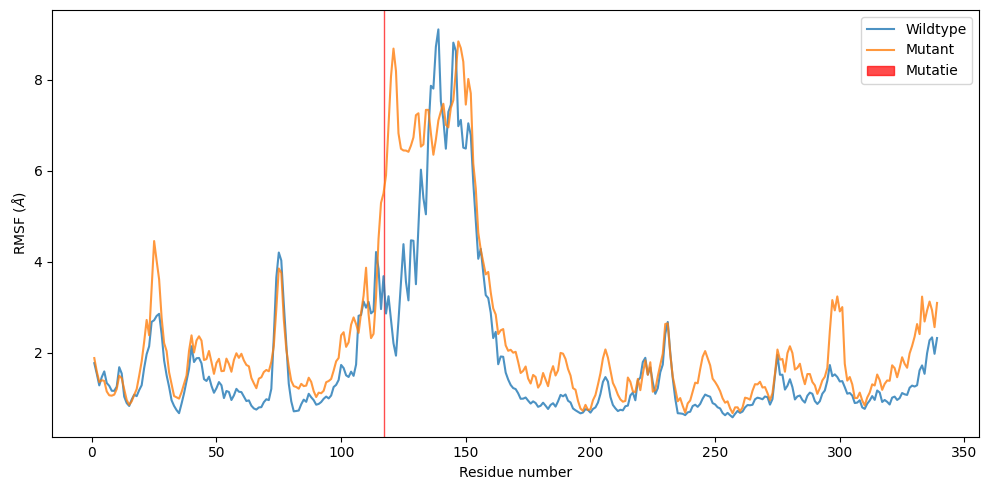

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(ca_wt.resids, rmsf_wt.results.rmsf, label='Wildtype', alpha=0.8)
plt.plot(ca_mut.resids, rmsf_mut.results.rmsf, label='Mutant', alpha=0.8)
plt.xlabel('Residue number')
plt.ylabel(r'RMSF ($\AA$)')
plt.axvspan(117,117, zorder=0, alpha=0.7, color='red', label='Mutatie')
plt.legend()
plt.tight_layout()
plt.show()

Rond aminozuur 150 zit een bewegelijk gedeelte met een hoge RMSF.
De RMSF van het gemuteerde eiwit varieert veel meer dan het wildtype, aanzienlijk voor de piek van het ~150ste aminozuur stijgt het RMSF eerder dan het wildtype. Deze regio bestaat uit lange loops die altijd wel varieren. 

In [15]:
vegfr2 = vegfr2.select_atoms('name CA')
vegfr2_mutant = vegfr2_mutant.select_atoms('name CA')

n_vegfr2 = len(vegfr2)
n_vegfr2_mutant = len(vegfr2_mutant)
print('vegfr2 has {} residues and vegfr2_mutant has {} residues'.format(n_vegfr2, n_vegfr2_mutant))

vegfr2 has 339 residues and vegfr2_mutant has 339 residues


In [16]:
align.alignto(vegfr2_mutant, vegfr2, select='name CA')
dist_arr = distances.distance_array(vegfr2.positions, 
                                    vegfr2_mutant.positions)

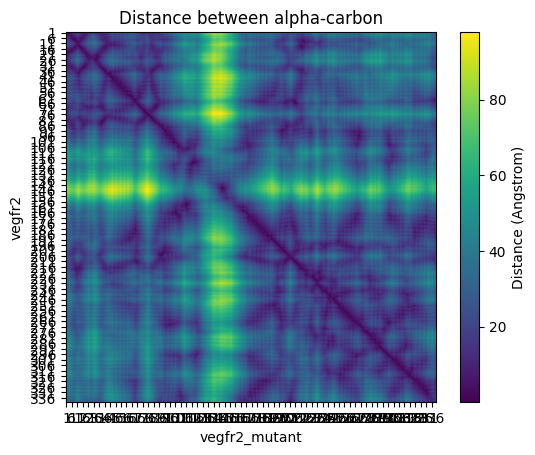

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

tick_interval = 5
ax.set_yticks(np.arange(n_vegfr2)[::tick_interval])
ax.set_xticks(np.arange(n_vegfr2_mutant)[::tick_interval])
ax.set_yticklabels(vegfr2.resids[::tick_interval])
ax.set_xticklabels(vegfr2_mutant.resids[::tick_interval])

plt.ylabel('vegfr2')
plt.xlabel('vegfr2_mutant')
plt.title('Distance between alpha-carbon')

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')
plt.show()

## PCA

![s](images/vegf2_vegf2mutant_animation_PCA.gif)

De bovenstaande animatie weergeeft naast het eiwit ook de bewegingen van de onderdelen, met de gekleurde cilinders worden deze weergeven.
Met behulp van een principale componenten analyse is de lengte / kleur van de cilinders bepaald. De loops die deel uitmaken van het scharnier, het meest bewegelijke deel van het eiwit heeft hier langere cilinders. 

Dit gegedeelte, rond residue 1054, maakt deel uit van activation loop A ([bron](https://doi.org/10.1074/jbc.RA119.008643))
en is betrokken bij het activeren van het eiwit. In deze inactieve toestand, het deksel is dicht zodat ATP niet kan binden.
Wanneer VEGF bind met deze receptor (VEGFR2), de receptor dimeriseert wat leidt to autofosforylyse van Tyr801, Try951, Try1175, and Try1214. ([bron](https://doi.org/10.3389/fcell.2020.599281))


## Veranderingen opzoeken in de literatuur
![png](images/afbeelding_artikel.png)

We hebben ook nog in de literatuur gekeken naar de effecten van deze mutatie. In deze afbeelding is de activiteit te zien van het wildtype en de mutant in een aantal gefosfolyeerde VEGF-gestimuleerde receptoren. Links staat het wildtype en rechts staat de mutant. In dit onderzoek hebben ze ook gevonden dat Tyrosine 951 in het kinase insert domain nodig is voor de activatie van de receptor en signaling. De mutant (fenylalanine 951) liet ligand-geïnduceerde fosforylatie van de activatie loop zien bij tyrosine 1054 en 1059, dit is nodig voor kinase activatie. Tyrosine 1175 werd niet gefosforyleerd in de mutant, maar wel in het wildtype. [bron](https://www.researchgate.net/publication/264745589_Functional_and_structural_characterization_of_the_kinase_insert_and_the_carboxy_terminal_domain_in_VEGF_receptor_2_activation)